In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

# **Data Wrangling:**

In [3]:
df = pd.read_csv("../input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv")
df.head()

ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0       0.0                           1  
1    1000.0       0.0    2000.0                           1  
2    1000.0    1000.0    5000.0                           0  
3    1100.0    1069.0    1000.0                           0  
4    9000.0     689.0     679.0                           0  

[5 rows x 25 columns]

Firstly, Null values need to be checked, 
however, after checking this dataset, there are 
no null values. Then, column ID has been 
removed from the data because it contains just 
a normal serial number of observations.

In [4]:
df.drop(['ID'], axis=1, inplace=True) # Deleting column ID

In [5]:
df.isnull().sum() # No null values.

LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [6]:
df.shape   # Shape of DataFrame.

(30000, 24)

In [7]:
df.columns # Columns of DataFrame

Index(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [8]:
df.describe()

LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean    167484.322667      1.603733      1.853133      1.551867     35.485500   
std     129747.661567      0.489129      0.790349      0.521970      9.217904   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  30000.000000  30000.000000  30000.000000  30000.000000  30000.000000   
mean      -0.016700     -0.133767     -0.166200     -0.220667     -0.266200   
std        1.123802      1.197186      1.196868      1.169139      1.133187   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

       ...      BILL_AMT4      BILL_AMT5      BILL_AMT6       PAY_AMT1  \
count  ...   30000.000000   30000.000000   30000.000000   30000.000000   
mean   ...   43262.948967   40311.400967   38871.760400    5663.580500   
std    ...   64332.856134   60797.155770   59554.107537   16563.280354   
min    ... -170000.000000  -81334.000000 -339603.000000       0.000000   
25%    ...    2326.750000    1763.000000    1256.000000    1000.000000   
50%    ...   19052.000000   18104.500000   17071.000000    2100.000000   
75%    ...   54506.000000   50190.500000   49198.250000    5006.000000   
max    ...  891586.000000  927171.000000  961664.000000  873552.000000   

           PAY_AMT2      PAY_AMT3       PAY_AMT4       PAY_AMT5  \
count  3.000000e+04   30000.00000   30000.000000   30000.000000   
mean   5.921163e+03    5225.68150    4826.076867    4799.387633   
std    2.304087e+04   17606.96147   15666.159744   15278.305679   
min    0.000000e+00       0.00000       0.000000       0.000000   
25%    8.330000e+02     390.00000     296.000000     252.500000   
50%    2.009000e+03    1800.00000    1500.000000    1500.000000   
75%    5.000000e+03    4505.00000    4013.250000    4031.500000   
max    1.684259e+06  896040.00000  621000.000000  426529.000000   

            PAY_AMT6  default.payment.next.month  
count   30000.000000                30000.000000  
mean     5215.502567                    0.221200  
std     17777.465775                    0.415062  
min         0.000000                    0.000000  
25%       117.750000                    0.000000  
50%      1500.000000                    0.000000  
75%      4000.000000                    0.000000  
max    528666.000000                    1.000000  

[8 rows x 24 columns]

# **Correlation Matrix Plot**
We can demonstrate that no variables 
are strongly correlated with the Target variable 
(default). The ‘PAY_’ variables have a strong 
correlation between them and have a weak 
positive correlation with the target 
variable(default). All the ‘BILL_AMT’ 
variables have a good positive correlation 
between them. Also, ‘LIMIT_BAL’ has a good 
positive correlation with ‘BILL_AMT’ 
variables.

<AxesSubplot:>

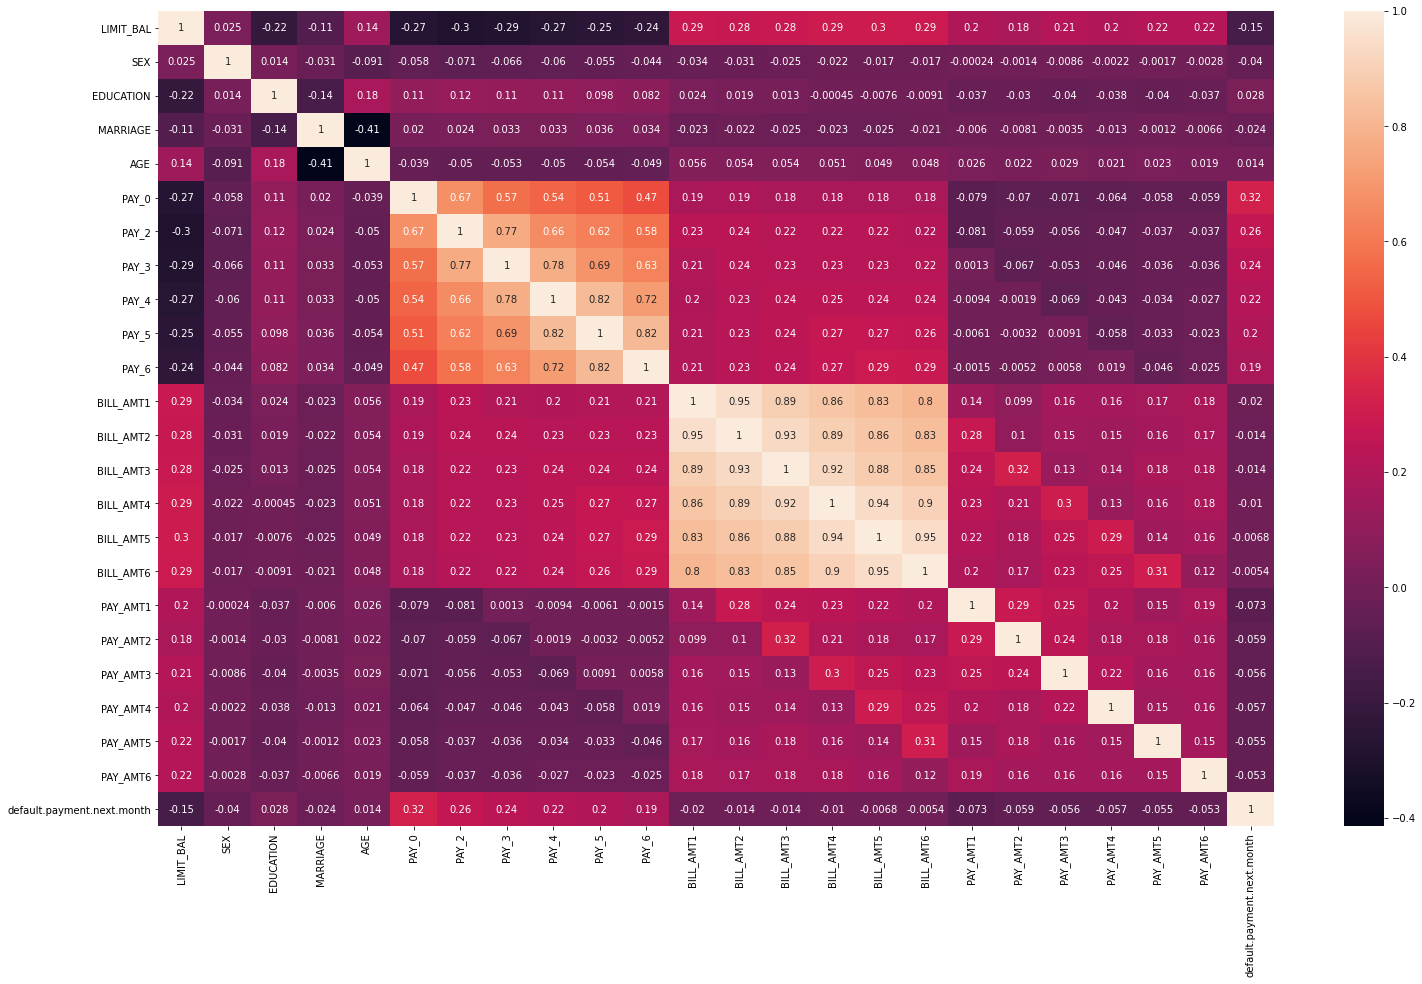

In [9]:
corr = df.corr()
plt.figure(figsize=(25,15))
sns.heatmap(corr, annot=True)

# **Splitting data into train and test**
We have split this data into 75% and 25% for 
train and test sets respectively using 
sklearn.model_selection train_test_split. We 
created x_train, x_test, y_train and y_test.
Also, we have transformed the data using 
sklearn. preprocessing MinMaxScaler. Here, 
we have used x_train and x_test to transform 
them into xtrain_scaler and xtest_scalar 
because there are many observations with large 
ranges such as ‘TOTAL_PAY’, 
‘LIMIT_BALANCE’ and ‘TOTAL_BILL’. 
We are using MinMaxScaler to scale our 
variables and convert them in the range 0-1. 
Since all variables are transformed using the 
same MinMaxScaler in the same range 0-1, so 
the degree to which it affects our target variable 
will become equal and will avoid variables 
from being biased because of large range 
values.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [11]:
x = df[['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']]
y = df['default.payment.next.month']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=3)

xtrain_scaler = MinMaxScaler().fit_transform(x_train)
xtest_scaler = MinMaxScaler().fit_transform(x_test)

# **Machine Learning Models:**
This project will use 5 Machine Learning models:
# **1. KNN:**

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

> ***Checking for which K, model is generating more accuracy. Using normal train and test data.***

In [13]:
i = 1
k = np.arange(1, 30, 1)
k_val_acc = []
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)              # Fitting model with x_train and y_train
    y_pred = knn.predict(x_test)           # Predicting the results
    k_val_acc.append(metrics.accuracy_score(y_test, y_pred))
    print("Accuracy for K = {0} is: ".format(i),metrics.accuracy_score(y_test, y_pred))
    
m = max(k_val_acc)

print("We got max accuracy of {0} when K = {1}". format(max(k_val_acc), [i+1 for i, j in enumerate(k_val_acc) if j == m]))

Accuracy for K = 1 is:  0.6953333333333334
Accuracy for K = 2 is:  0.7757333333333334
Accuracy for K = 3 is:  0.7429333333333333
Accuracy for K = 4 is:  0.7773333333333333
Accuracy for K = 5 is:  0.7585333333333333
Accuracy for K = 6 is:  0.7768
Accuracy for K = 7 is:  0.7649333333333334
Accuracy for K = 8 is:  0.7745333333333333
Accuracy for K = 9 is:  0.7690666666666667
Accuracy for K = 10 is:  0.7768
Accuracy for K = 11 is:  0.7682666666666667
Accuracy for K = 12 is:  0.7812
Accuracy for K = 13 is:  0.774
Accuracy for K = 14 is:  0.7813333333333333
Accuracy for K = 15 is:  0.7750666666666667
Accuracy for K = 16 is:  0.7828
Accuracy for K = 17 is:  0.7792
Accuracy for K = 18 is:  0.784
Accuracy for K = 19 is:  0.7813333333333333
Accuracy for K = 20 is:  0.7838666666666667
Accuracy for K = 21 is:  0.7798666666666667
Accuracy for K = 22 is:  0.7837333333333333
Accuracy for K = 23 is:  0.7809333333333334
Accuracy for K = 24 is:  0.7844
Accuracy for K = 25 is:  0.7826666666666666
Accurac

> ***Checking for which K, model is generating more accuracy. Using transformed train and test data.***

In [14]:
i = 1
k = np.arange(1, 30, 1)
k_val_acc_mms = []
for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain_scaler, y_train)              # Fitting model with xtrain_scaler and y_train
    y_pred_mms = knn.predict(xtest_scaler)       # Predicting the results
    k_val_acc_mms.append(metrics.accuracy_score(y_test, y_pred_mms))
    print("Accuracy for K = {0} is: ".format(i),metrics.accuracy_score(y_test, y_pred_mms))
    
m = max(k_val_acc_mms)

print("We got max accuracy of {0} when K = {1}". format(max(k_val_acc_mms), [i+1 for i, j in enumerate(k_val_acc_mms) if j == m]))

Accuracy for K = 1 is:  0.7030666666666666
Accuracy for K = 2 is:  0.7816
Accuracy for K = 3 is:  0.7636
Accuracy for K = 4 is:  0.7978666666666666
Accuracy for K = 5 is:  0.794
Accuracy for K = 6 is:  0.8084
Accuracy for K = 7 is:  0.8065333333333333
Accuracy for K = 8 is:  0.8105333333333333
Accuracy for K = 9 is:  0.8093333333333333
Accuracy for K = 10 is:  0.8132
Accuracy for K = 11 is:  0.8109333333333333
Accuracy for K = 12 is:  0.8109333333333333
Accuracy for K = 13 is:  0.8130666666666667
Accuracy for K = 14 is:  0.814
Accuracy for K = 15 is:  0.8152
Accuracy for K = 16 is:  0.8132
Accuracy for K = 17 is:  0.8154666666666667
Accuracy for K = 18 is:  0.8142666666666667
Accuracy for K = 19 is:  0.816
Accuracy for K = 20 is:  0.8169333333333333
Accuracy for K = 21 is:  0.8166666666666667
Accuracy for K = 22 is:  0.8169333333333333
Accuracy for K = 23 is:  0.8174666666666667
Accuracy for K = 24 is:  0.8176
Accuracy for K = 25 is:  0.8176
Accuracy for K = 26 is:  0.8170666666666667


**Confusion Matrix of model with transformed data:**

Confusion Matrix: 
 [[5609  303]
 [1063  525]]
              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5912
           1       0.63      0.33      0.43      1588

    accuracy                           0.82      7500
   macro avg       0.74      0.64      0.66      7500
weighted avg       0.80      0.82      0.79      7500

Accuracy: 0.8178666666666666
Recall/Sensitivity/True Positive Rate: 0.3306045340050378
Precision: 0.6340579710144928


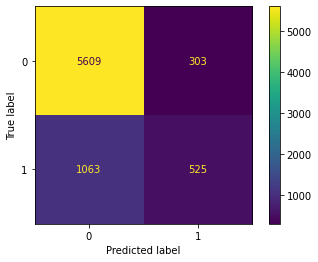

In [15]:
plot_confusion_matrix(knn, xtest_scaler, y_test)

conf_metr = metrics.confusion_matrix(y_test, y_pred_mms)

print("Confusion Matrix: \n {}".format(conf_metr))
print(metrics.classification_report(y_test,y_pred_mms))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_mms))
print("Recall/Sensitivity/True Positive Rate:",metrics.recall_score(y_test, y_pred_mms))
print("Precision:",metrics.precision_score(y_test, y_pred_mms))

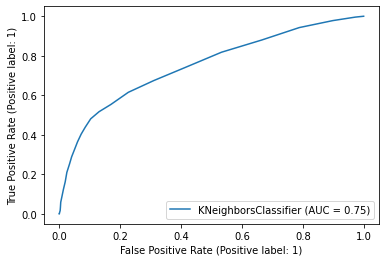

In [16]:
# ROC Curve:
metrics.plot_roc_curve(knn, xtest_scaler, y_test)

First, we checked for which K, our model has 
the best accuracy. We performed KNN two 
times, once with normal train and test sets and 
a second time with transformed 
(MinMaxScaler) train and test sets.
1. During our first model, we found results as:
* K: 28
* Accuracy: 78.56 %
2. During our second model of KNN with transformed sets:
* K: 29
* Accuracy: 81.78 %
3. After plotting confusion matrix with transformed sets, we were able to get:
* Accuracy: 81.78 % 
* Precision: 63.40 %
* Recall: 33.06 %

Shows ROC Curve and it can be 
observed that “Area Under the Curve” is 0.75. We can observe a decent ROC curve.

# **2. Logistic Regression:**

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

> ***HyperParameter Tuned model with normal train and test data:***

In [18]:
c_val = [0.001,0.01,0.1,0.5,1.0]

logreg = LogisticRegression(solver = 'liblinear')
hyperParam = [{'C':c_val}]

gsv = GridSearchCV(logreg,hyperParam,cv=5,verbose=1)
best_model = gsv.fit(x_train, y_train)                      # Fitting model with x_train and y_train
logreg_pred = best_model.best_estimator_.predict(x_test)    # Predicting the results


print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy :",best_model.score(x_test, y_test))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best HyperParameter:  {'C': 0.1}
Best Accuracy : 0.7881333333333334


> ***HyperParameter Tuned model with transformed training and testing data:***

In [19]:
c_val = [0.001,0.01,0.1,0.5,1.0]

logreg = LogisticRegression(solver = 'liblinear')
hyperParam = [{'C':c_val}]

gsv = GridSearchCV(logreg,hyperParam,cv=5,verbose=1)
best_model = gsv.fit(xtrain_scaler, y_train)                       # Fitting model with xtrain_scaler and y_train
logreg_pred_mms = best_model.best_estimator_.predict(xtest_scaler) # Predicting the results

print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy :",best_model.score(xtest_scaler, y_test))

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best HyperParameter:  {'C': 1.0}
Best Accuracy : 0.8268


**Confusion Matrix of model with transformed data:**

Confusion Matrix: 
 [[5671  241]
 [1058  530]]
              precision    recall  f1-score   support

           0       0.84      0.96      0.90      5912
           1       0.69      0.33      0.45      1588

    accuracy                           0.83      7500
   macro avg       0.77      0.65      0.67      7500
weighted avg       0.81      0.83      0.80      7500

Accuracy: 0.8268
Recall/Sensitivity/True Positive Rate: 0.3337531486146096
Precision: 0.6874189364461738


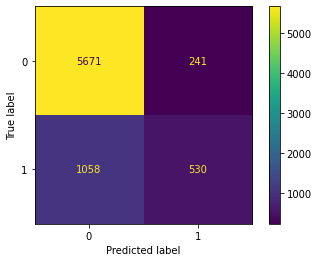

In [20]:
plot_confusion_matrix(gsv,xtest_scaler, y_test)

conf_metr = confusion_matrix(y_test, logreg_pred_mms)

print("Confusion Matrix: \n {}".format(conf_metr))
print(metrics.classification_report(y_test,logreg_pred_mms))
print("Accuracy:",metrics.accuracy_score(y_test, logreg_pred_mms))
print("Recall/Sensitivity/True Positive Rate:",metrics.recall_score(y_test, logreg_pred_mms))
print("Precision:",metrics.precision_score(y_test, logreg_pred_mms))

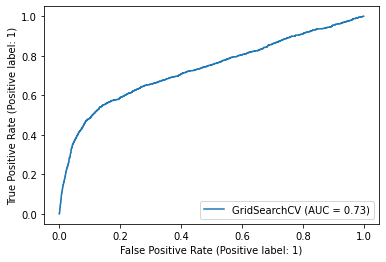

In [21]:
# ROC Curve:
metrics.plot_roc_curve(gsv, xtest_scaler, y_test)

Next, Logistic Regression was used for this 
dataset. This model is tuned by giving ‘C’ 
[0.001,0.01,0.1,0.5,1.0] and assigning the
solver as ‘liblinear’. This model is 
hyperparameter tuned using sklearn’s 
GridSearchCV. We performed this model two 
times, once with normal train and test sets and 
a second time with transformed 
(MinMaxScaler) train and test sets.
1. During our first model, we found results as:
* C: 0.001
* Accuracy: 78.81 %
2. During our second model with transformed sets:
* C: 1.0
* Accuracy: 82.68 %
3. After plotting confusion matrix with transformed sets, we were able to get:
* Accuracy: 82.68 % 
* Precision: 68.74 %
* Recall: 33.37 %

Shows ROC Curve and it can be observed that “Area Under the Curve” is 0.73. The ROC Curve can be used to compare with other models, it showsthe area under the curve. Large values on Y-Axis demonstrates lower false negatives and higher true positives.

# **3. Decision Tree:**

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

> ***Unpruned Tree with normal train and test data:***

In [23]:
dtree_up = DecisionTreeClassifier()
dtree_up.fit(x_train, y_train)                  # Fitting model with x_train and y_train
dtree_pred_up = dtree_up.predict(x_test)        # Predicting the results
print("Accuracy is: ",metrics.accuracy_score(y_test, dtree_pred_up))

Accuracy is:  0.7334666666666667


> ***Pruned Tree after applying model with normal train and test data:***

In [24]:
i = 1
d = np.arange(1, 20, 1)
depth = []
for i in d:
    dtree = DecisionTreeClassifier(max_depth=i)
    dtree.fit(x_train, y_train)                # Fitting model with x_train and y_train
    dtree_pred = dtree.predict(x_test)         # Predicting the results
    depth.append(metrics.accuracy_score(y_test, dtree_pred))
    print("Accuracy when max_depth = {0}: ".format(i),metrics.accuracy_score(y_test, dtree_pred))

m = max(depth)

print("We got max accuracy of {0} when max_depth = {1}". format(max(depth), [i+1 for i, j in enumerate(depth) if j == m]))

Accuracy when max_depth = 1:  0.8294666666666667
Accuracy when max_depth = 2:  0.8290666666666666
Accuracy when max_depth = 3:  0.83
Accuracy when max_depth = 4:  0.8304
Accuracy when max_depth = 5:  0.8297333333333333
Accuracy when max_depth = 6:  0.8277333333333333
Accuracy when max_depth = 7:  0.8277333333333333
Accuracy when max_depth = 8:  0.8245333333333333
Accuracy when max_depth = 9:  0.8218666666666666
Accuracy when max_depth = 10:  0.8172
Accuracy when max_depth = 11:  0.8154666666666667
Accuracy when max_depth = 12:  0.8125333333333333
Accuracy when max_depth = 13:  0.8048
Accuracy when max_depth = 14:  0.7982666666666667
Accuracy when max_depth = 15:  0.7922666666666667
Accuracy when max_depth = 16:  0.7852
Accuracy when max_depth = 17:  0.7826666666666666
Accuracy when max_depth = 18:  0.7765333333333333
Accuracy when max_depth = 19:  0.7729333333333334
We got max accuracy of 0.8304 when max_depth = [4]


> ***Pruned Tree applying model with transformed training and testing data:***

In [25]:
i = 1
d = np.arange(1, 20, 1)
depth_mms = []
for i in d:
    dtree = DecisionTreeClassifier(max_depth=i)
    dtree.fit(xtrain_scaler, y_train)             # Fitting model with xtrain_scaler and y_train
    dtree_pred_mms = dtree.predict(xtest_scaler)  # Predicting the results
    depth_mms.append(metrics.accuracy_score(y_test, dtree_pred_mms))
    print("Accuracy when max_depth = {0}: ".format(i),metrics.accuracy_score(y_test, dtree_pred_mms))

m = max(depth_mms)

print("We got max accuracy of {0} when max_depth = {1}". format(max(depth_mms), [i+1 for i, j in enumerate(depth_mms) if j == m]))

Accuracy when max_depth = 1:  0.8294666666666667
Accuracy when max_depth = 2:  0.8061333333333334
Accuracy when max_depth = 3:  0.8306666666666667
Accuracy when max_depth = 4:  0.8250666666666666
Accuracy when max_depth = 5:  0.824
Accuracy when max_depth = 6:  0.8054666666666667
Accuracy when max_depth = 7:  0.8185333333333333
Accuracy when max_depth = 8:  0.804
Accuracy when max_depth = 9:  0.8038666666666666
Accuracy when max_depth = 10:  0.7454666666666667
Accuracy when max_depth = 11:  0.7330666666666666
Accuracy when max_depth = 12:  0.672
Accuracy when max_depth = 13:  0.6418666666666667
Accuracy when max_depth = 14:  0.6408
Accuracy when max_depth = 15:  0.6268
Accuracy when max_depth = 16:  0.6182666666666666
Accuracy when max_depth = 17:  0.6033333333333334
Accuracy when max_depth = 18:  0.5994666666666667
Accuracy when max_depth = 19:  0.5690666666666667
We got max accuracy of 0.8306666666666667 when max_depth = [3]


**Confusion Matrix of Pruned Tree model with transformed training and testing data:**

Confusion Matrix: 
 [[3531 2381]
 [ 851  737]]
              precision    recall  f1-score   support

           0       0.81      0.60      0.69      5912
           1       0.24      0.46      0.31      1588

    accuracy                           0.57      7500
   macro avg       0.52      0.53      0.50      7500
weighted avg       0.69      0.57      0.61      7500

Accuracy: 0.5690666666666667
Recall/Sensitivity/True Positive Rate: 0.4641057934508816
Precision: 0.23636946760744068


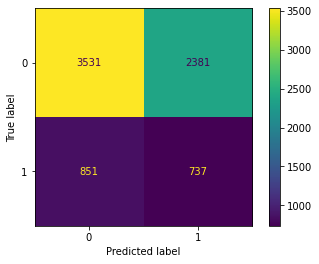

In [26]:
plot_confusion_matrix(dtree, xtest_scaler, y_test)

conf_metr = metrics.confusion_matrix(y_test, dtree_pred_mms)

print("Confusion Matrix: \n {}".format(conf_metr))
print(metrics.classification_report(y_test,dtree_pred_mms))
print("Accuracy:",metrics.accuracy_score(y_test, dtree_pred_mms))
print("Recall/Sensitivity/True Positive Rate:",metrics.recall_score(y_test, dtree_pred_mms))
print("Precision:",metrics.precision_score(y_test, dtree_pred_mms))

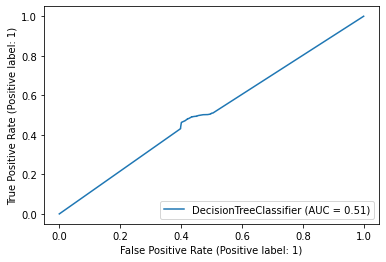

In [27]:
# ROC Curve:
metrics.plot_roc_curve(dtree, xtest_scaler, y_test)

**Visualizing Decision Tree**

In [28]:
pip install pydotplus

     |████████████████████████████████| 278 kB 1.2 MB/s 
  Created wheel for pydotplus: filename=pydotplus-2.0.2-py3-none-any.whl size=24566 sha256=3fffb397520c8060e9271c7fb2698a1b12812af3acb97cd83ce5d05c18d164b4
  Stored in directory: /root/.cache/pip/wheels/1e/7b/04/7387cf6cc9e48b4a96e361b0be812f0708b394b821bf8c9c50
Successfully built pydotplus
Note: you may need to restart the kernel to use updated packages.


In [29]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.25501 to fit

dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.25501 to fit



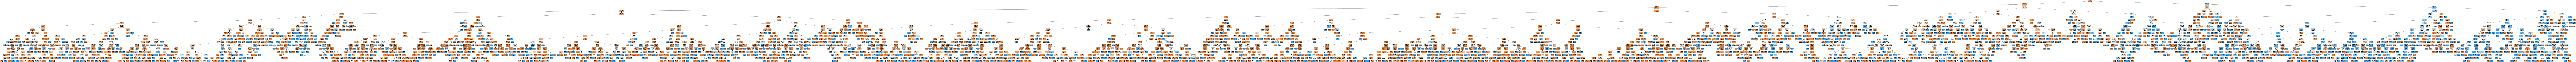

In [30]:
feat = ['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feat,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Credit_Card_Tree.png')
Image(graph.create_png())

Next, Decision Tree is used for this dataset. We 
have used 3 variants of models: 1st Full tree with 
normal test and train sets, 2nd Pruned tree with 
normal test and train sets, and 3rd Pruned tree 
with transformed (MinMaxScaler) train and test 
sets.
1. Decision Tree (Unpruned) with normal test and train sets:
* Accuracy: 73.34 %
2. Decision Tree – which was pruned using max_depth for 1 to 20 range and used normal train and test sets here.
* Accuracy: 83.04 %
* max_depth: 4
2. Decision Tree – which was pruned using max_depth for 1 to 20 range and this time using transformed (MinMaxScaler) train and test sets.
* Accuracy: 83.06 %
* max_depth: 3
3. After plotting confusion matrix (Fig. 6) with transformed sets, we were able to get:
* Accuracy: 57.21 % 
* Precision: 24.61 %
* Recall: 47.10 %

Shows ROC Curve and it can be observed that “Area Under the Curve” is 0.55. The ROC Curve can be used to compare with other models, it shows the area under the curve. We got not good results here, it is clearly visible in ROC that area under the curve is less.

# **4. Random Forest:**

In [31]:
from sklearn.ensemble import RandomForestClassifier

> ***Simple Random Forest with transformed data:***

In [32]:
rf = RandomForestClassifier()
rf.fit(xtrain_scaler, y_train)             # Fitting model with xtrain_scaler and y_train
rf_pred = rf.predict(xtest_scaler)         # Predicting the results
#est_per.append(metrics.accuracy_score(y_test, rf_pred))
print("Accuracy: {0}".format(metrics.accuracy_score(y_test, rf_pred)))

Accuracy: 0.7869333333333334


> ***Hyperparameter Tuned Random Forest with transformed data:***

In [33]:
estimators = [10,50,80,100,150,200,250,300]

rf = RandomForestClassifier(max_depth=3,random_state=5)
hyperParam = [{'n_estimators':estimators}]

gsv = GridSearchCV(rf,hyperParam,cv=5,verbose=1)
best_model = gsv.fit(xtrain_scaler, y_train)                       # Fitting model with xtrain_scaler and y_train
rf_pred_mms = best_model.best_estimator_.predict(xtest_scaler)     # Predicting the results

print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy :",best_model.score(xtest_scaler, y_test))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best HyperParameter:  {'n_estimators': 10}
Best Accuracy : 0.818


**Confusion Matrix of Hyperparameter Tuned Random Forest model with transformed data:**

Confusion Matrix: 
 [[5731  181]
 [1184  404]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      5912
           1       0.69      0.25      0.37      1588

    accuracy                           0.82      7500
   macro avg       0.76      0.61      0.63      7500
weighted avg       0.80      0.82      0.78      7500

Accuracy: 0.818
Recall/Sensitivity/True Positive Rate: 0.25440806045340053
Precision: 0.6905982905982906


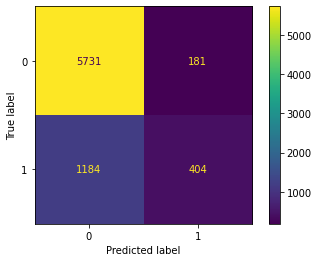

In [34]:
plot_confusion_matrix(gsv, xtest_scaler, y_test)

conf_metr = confusion_matrix(y_test, rf_pred_mms)

print("Confusion Matrix: \n {}".format(conf_metr))
print(metrics.classification_report(y_test,rf_pred_mms))
print("Accuracy:",metrics.accuracy_score(y_test, rf_pred_mms))
print("Recall/Sensitivity/True Positive Rate:",metrics.recall_score(y_test, rf_pred_mms))
print("Precision:",metrics.precision_score(y_test, rf_pred_mms))

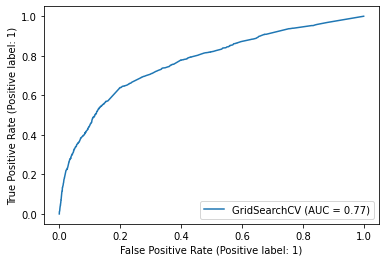

In [35]:
# ROC Curve:
metrics.plot_roc_curve(gsv, xtest_scaler, y_test)

Next, we used Random Forest. We used two 
models of Random Forest for the dataset. Both 
times, we used transformed (MinMaxScaler) 
train and test sets. 1st model is Simple Random 
Forest and 2nd model is hyperparameter tuned 
Random Forest model.
1. During our first simple model, we found results as:
* Accuracy: 79.44 %
2. For second model, we have used hyperparameter tuning, for this we changed max_depth to 3 (because we had got depth 3 for decision tree which showed best accuracy), random state = 5 and n_estimators values as[10,50,80,100,150,200,250,300]. This model is hyperparameter tuned using sklearn’s GridSearchCV.
* Accuracy: 81.80 %
* n_estimator: 10
3. After plotting confusion matrix with transformed sets, we were able to get:
* Accuracy: 81.80 % 
* Precision: 69.05 %
* Recall: 25.44 %

Shows ROC Curve and it can be observed that “Area Under the Curve” is 0.77. The ROC Curve can be used to compare with other models, it shows the area under the curve. Large values on Y-Axis demonstrates lower false negatives and higher true positives.

# **5. SVC (Support Vector Classifier):**

In [36]:
from sklearn.svm import SVC

> ***Tuned Model with transformed data:***

In [37]:
kernels = ['rbf','linear','poly','sigmoid']

svc = SVC()
hyperParam = [{'kernel':kernels}]

gsv = GridSearchCV(svc,hyperParam,cv=5,verbose=1)
best_model = gsv.fit(xtrain_scaler, y_train)                       # Fitting model with xtrain_scaler and y_train
svc_pred_mms = best_model.best_estimator_.predict(xtest_scaler)    # Predicting the results

print("Best HyperParameter: ",gsv.best_params_)
print("Best Accuracy :",best_model.score(xtest_scaler, y_test))

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best HyperParameter:  {'kernel': 'poly'}
Best Accuracy : 0.8164


**Confusion Matrix Tuned Model with transformed data:**

Confusion Matrix: 
 [[5750  162]
 [1215  373]]
              precision    recall  f1-score   support

           0       0.83      0.97      0.89      5912
           1       0.70      0.23      0.35      1588

    accuracy                           0.82      7500
   macro avg       0.76      0.60      0.62      7500
weighted avg       0.80      0.82      0.78      7500

Accuracy: 0.8164
Recall/Sensitivity/True Positive Rate: 0.23488664987405541
Precision: 0.697196261682243


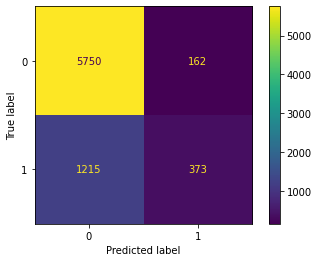

In [38]:
plot_confusion_matrix(gsv, xtest_scaler, y_test)

conf_metr = confusion_matrix(y_test, svc_pred_mms)

print("Confusion Matrix: \n {}".format(conf_metr))
print(metrics.classification_report(y_test,svc_pred_mms))
print("Accuracy:",metrics.accuracy_score(y_test, svc_pred_mms))
print("Recall/Sensitivity/True Positive Rate:",metrics.recall_score(y_test, svc_pred_mms))
print("Precision:",metrics.precision_score(y_test, svc_pred_mms))

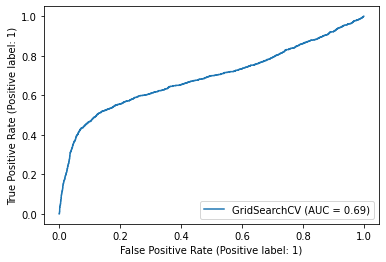

In [39]:
# ROC Curve:
metrics.plot_roc_curve(gsv, xtest_scaler, y_test)

Next, we used Support Vector Machine for this dataset. This model is tuned using 4 kernel values [‘rbf’, ‘linear’, ‘poly’ and ‘sigmoid’].
1. Used this model with transformed (MinMaxScaler) train and test sets.
* Accuracy: 81.64 %
* Kernel: poly
2. After plotting confusion matrix with transformed sets, we were able to get:
* Accuracy: 81.64 % 
* Precision: 69.71 %
* Recall: 23.48 %

Shows ROC Curve and it can be observed that the “Area Under the Curve” is 0.69. The ROC Curve which we can use to compare with other models, it shows the area under the curve. From the ROC curve, we can demonstrate that area under the curve is less.


# **Bagging with all classifiers using Cross Validation:**

In [40]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier

In [41]:
# Creating classifiers
knn = KNeighborsClassifier()
lg = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC()

clf_array = [knn, lg, dt, rf,svc]

for clf in clf_array:
    cc_scores = cross_val_score(clf, x, y, cv=10, n_jobs=-1)
    bagging_clf = BaggingClassifier(clf, max_samples=0.25, max_features=10, random_state=3)
    bagging_scores = cross_val_score(bagging_clf, x, y, cv=10, n_jobs=-1)
    
    print("Accuracy of: {1:.3f}, std: (+/-) {2:.3f} [{0}]".format(clf.__class__.__name__,cc_scores.mean(), cc_scores.std()))
    print("Accuracy of: {1:.3f}, std: (+/-) {2:.3f} [Bagging {0}]\n".format(clf.__class__.__name__,bagging_scores.mean(), bagging_scores.std()))

Accuracy of: 0.756, std: (+/-) 0.007 [KNeighborsClassifier]
Accuracy of: 0.783, std: (+/-) 0.002 [Bagging KNeighborsClassifier]

Accuracy of: 0.779, std: (+/-) 0.001 [LogisticRegression]
Accuracy of: 0.781, std: (+/-) 0.002 [Bagging LogisticRegression]

Accuracy of: 0.727, std: (+/-) 0.010 [DecisionTreeClassifier]
Accuracy of: 0.803, std: (+/-) 0.007 [Bagging DecisionTreeClassifier]

Accuracy of: 0.816, std: (+/-) 0.009 [RandomForestClassifier]
Accuracy of: 0.815, std: (+/-) 0.008 [Bagging RandomForestClassifier]

Accuracy of: 0.779, std: (+/-) 0.000 [SVC]
Accuracy of: 0.779, std: (+/-) 0.000 [Bagging SVC]



In [42]:
clf = [knn, lg, dt, rf,svc]
eclf = VotingClassifier(estimators=[('KNN', knn), ('Logistic Regression', lg), ('Decision Tree', dt), ('Random Forest', rf), ('SVC', svc)], voting='hard')
for clf, label in zip([knn, lg, dt, rf,svc, eclf], ['KNN', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'SVC', 'Ensemble']):
    scores = cross_val_score(clf, x_train, y_train, cv=10, scoring='accuracy')
    print("Accuracy: %0.3f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.750 (+/- 0.01) [KNN]
Accuracy: 0.776 (+/- 0.00) [Logistic Regression]
Accuracy: 0.721 (+/- 0.01) [Decision Tree]
Accuracy: 0.813 (+/- 0.01) [Random Forest]
Accuracy: 0.776 (+/- 0.00) [SVC]
Accuracy: 0.786 (+/- 0.00) [Ensemble]


Next, we used the bagging method, and this will 
create all models using different data and a 
weighted average will be used to determine the 
result. We have used all 5 ML models (KNN, 
Logistic, Decision Tree, Random Forest and 
SVM). We hyperparameter BaggingClassifier 
with all 5 ML models, max_samples=0.25, 
max_features=10, random_state=3. For cross 
val score, parameters are passed like cv = 10 
and n_jobs = -1. We can see from the below 
that for KNN, Logistic and Decision 
Tree, accuracy is increasing, and the standard 
deviation is decreasing for KNN, Decision Tree 
and Random Forest.
To choose the best classifier, we will use 
Sklearn’s VotingClassifier, which will help us 
to combine different ML classifiers and will 
perform a vote on all classifiers.
Shows results we can observe that 
RandomForest had the best accuracy 81.30 % 
with a very low standard deviation of 0.01.

Note: Accuracy and Std deviation may change slightly after each run.

# **Boosting with all classifiers using Cross Validation:**

In [43]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from mlxtend.classifier import EnsembleVoteClassifier

In [44]:
# Creating classifiers
knn = KNeighborsClassifier()
lg = LogisticRegression()
dt = DecisionTreeClassifier()
rf = RandomForestClassifier()
svc = SVC()
ada_boost = AdaBoostClassifier()
grad_boost = GradientBoostingClassifier()
xgb_boost = XGBClassifier()
boost_array = [ada_boost, grad_boost, xgb_boost]
clf = [knn, lg, dt, rf,svc]
eclf = EnsembleVoteClassifier(clfs=[ada_boost, grad_boost, xgb_boost], voting='hard')
labels = ['Ada Boost', 'Grad Boost', 'XG Boost', 'Ensemble']
for clf, label in zip([ada_boost, grad_boost, xgb_boost, eclf], labels):
    scores = cross_val_score(clf, x, y, cv=10, scoring='accuracy')
    print("Accuracy: {0:.3f}, std: (+/-) {1:.3f} [{2}]".format(scores.mean(), scores.std(), label))

Accuracy: 0.817, std: (+/-) 0.009 [Ada Boost]
Accuracy: 0.821, std: (+/-) 0.011 [Grad Boost]
[17:13:22] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:13:25] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:13:29] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:13:32] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was chan

Lastly, we used boosting technique. This 
boosting is not random, and the current 
performance of the model will depend on 
previous models. We used Ada Boost 
Classifier, Gradient Boosting Classifier and XG 
Boost Classifier. We have used all 5 ML 
models (KNN, Logistic, Decision Tree, 
Random Forest and SVM). We 
hyperparametered cross val score with all 5 ML 
models, cv = 10 and scoring = ‘accuracy’. We 
also tuned ‘EnsembleVoteClassifier’ with voting = ‘hard’ and for all 3 boosters Ada boost, 
Gradient boost and XG Boost.
To choose the best classifier, we will use 
Sklearn’s VotingClassifier, which will help us 
to combine different ML classifiers and will 
perform a vote on all classifiers.
According to the results, Gradient boost came 
out to be best with 82.10 % accuracy and 0.011 
standard deviation.

Note: Accuracy and Std deviation may change slightly after each run.

# **Conclusion:**
The first dataset is the Credit Card dataset, 
where we had records from Taiwan from April 2005 to September 2005. This dataset was 
highly imbalanced and needed resampling or 
transformation. We used MinMaxScaler to 
transform our train and test data. After applying 
5 machine learning models with normal data 
and transformed data, it can be easily observed 
that the performance of all models was good 
with transformed train and test data. KNN, 
Logistic Regression and RandomForest gave 
the best accuracy around 82 %. Logistic 
Regression was best with 82.68 % accuracy, 
recall 84.27 % and 95.92 % recall. After 
applying bagging, it was observed that 
RandomForest came out to be the best with 
81.30 % accuracy and a very low 0.01 standard 
deviation. In last, we used boosting for all 5 
machine learning models and applied Ada 
boost, Gradient boost and XG boost. Out of 
these 3. Grad boost performed best when both 
accuracy and standard deviation were 
compared with other boosting methods. For 
Grad boost, we got 82.10 % accuracy and 0.011 
standard deviation.

Note: Accuracy and Std deviation may change slightly after each run.